# Библиотека sympy

**Sympy** - библиотека, позволяющая работать с математикой на python. Sympy работает исключительно с символьными записями.
То есть математические объекты записаны точно, без приближения.
Это похоже на работу **wolfram alpha**, мы вводим команду `sin(x) derivative`, и программа возвращает символьный результат `cos(x)`. 


## Введение

### Объявление символьных объектов

Для начала необходимо импортировать библиотеку: `import sympy as smp`. Для удобства присвоим ей сокращенное имя `smp`. Также для дальнейшей работы могут понадобиться `numpy` и `matplotlib`.

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp

Как было сказано ранее **sympy** работает с символами. Чтобы создать символьный объект используется метод `.symbols()`. 

In [180]:
x = smp.symbols('x') #создаём символьный объект x, с latex символом 'x'

In [181]:
x 

x

Теперь над данным символьным объектом могут произведены математические операции. Например:

In [182]:
smp.sin(x) #возвращает символьный объект - синус аргумента

sin(x)

Далее мы увидим, что часто необходимо строго указывать тип символьной переменной. Для этого необходимо заполнить соответствующее типу переменной поле значением `True`. Например:

In [183]:
y = smp.symbols('y',real = True) #переменная y - действительное число

Вот список булевых полей, которые могут быть заполнены для объявления типа объектов:
- real - действительное число $\in R$
- complex - комплексное число $\in C$
- integer - целое число $\in Z$
- positive - положительное число (можно заполнить вместе с другим полем - например создать положительное действительное число)

Ранее мы объявляли только символьные переменные, присваивали им имена, и производили над ними тригонометрические операции. Но иногда полезно обьявлять не переменные, а **функции**. Для это можно воспользоваться полем `cls` при создании символьного объекта.

In [184]:
f = smp.symbols('f',cls = smp.Function)

Строчкой выше была создана символьная функция f. Чтобы указать от каких переменных зависит созданная функция f, нужно воспользоваться конструкцией:

In [185]:
x = smp.symbols('x')
f = f(x)

Получили функцию $f$, зависящую от переменной $x$:

In [186]:
f

f(x)

### Математические операции над символьными объетами

#### Тригонометрия

`.cos(arg)` - косинус аргумента $\operatorname{cos}(arg)$

In [187]:
smp.cos(x)

cos(x)

#### Простые операции

`arg**power` - возведение выражения arg в стпень power $arg^{power}$

In [188]:
x**2

x**2

Также доступны операции вычитания `-`, сложения `+`, деления `/` ...

#### Решение уравнений

`.factor(arg)` - разложение многочлена arg на скобки(через корни уравнения)

In [189]:
poly = 2*x**2 + 3*x + 1
poly

2*x**2 + 3*x + 1

In [190]:
smp.factor(poly)

(x + 1)*(2*x + 1)

`.solve(f,x)` - решение уравнения $\operatorname{f}(x) = 0$. Возвращает вектор(одномерный массив `list`) решений уравнения

In [191]:
smp.solve(poly,x)

[-1, -1/2]

In [192]:
smp.solve(smp.cos(x),x)

[pi/2, 3*pi/2]

Как мы знаем, уравнение $x^2+1 = 0$ не имеет решений в действительных числах:

In [193]:
smp.solve(y**2+1,y) #ранее обьявляли y как действительное число. У уравнения нет решений

[]

In [194]:
smp.solve(x**2+1,x) #при объявлении x типа указано не было. Поэтому библиотека определила тип x автоматически. Получены решения в комплекных числах

[-I, I]

#### Математический анализ

##### Пределы

`.limit(eq,arg1,arg2)` - предел выражения `eq` при `arg1` стремящемся к `arg2` $\lim_{arg1 \to arg2} eq$. Попробуем посчитать $$\lim_{x \to \pi/2} \operatorname{sin}(x)+x$$

In [195]:
x = smp.symbols('x',real = True)
smp.limit(smp.sin(x)+x,x,smp.pi/2)

1 + pi/2

Как видим результат совпадет с тем, что мы ожидали. Вышенаписанный предел действительно равен $1+\pi/2$

Попробуем посчиать более сложный предел. Например:$$\lim_{x \to 0} \frac{e^{2x}-e^{-3x}}{\operatorname{sin}(4x)}$$

In [196]:
equation = (smp.exp(2*x)-smp.exp(-3*x))/(smp.sin(4*x))
smp.limit(equation,x,0)

5/4

Результат совпадает с реальностью. Воспользовавшись разложением функций по формуле тейлора(или правилом лопиталя) получим $5/4$

##### Производные

`.diff(func,arg)` - дифференцирование функции `func` по переменной `arg`

В sympy заложены все правила обращения с производными. Например, она умеет применять цепное правило для дифференцирования функций. Например

In [197]:
f,g = smp.symbols('f g',cls = smp.Function)
x = smp.symbols('x') 
f = f(x)
g = g(f) #функция g зависит от функции f, которая зависит от x


In [198]:
smp.diff(g) #дифференцирование функции g (согласно цепному правилу)

Derivative(f(x), x)*Derivative(g(f(x)), f(x))

В качестве примера, попробуем продифференцировать выражение $\operatorname{sin}(x)+20x^{2}$

In [199]:
smp.diff(smp.sin(x)+20*(x**2),x)

40*x + cos(x)

##### Первообразные и неопределенные интегралы

`integrate(f,arg)` - взятие первообразной функции `f` по переменной `arg`

Попробуем вычислить неопределенный интеграл функции распределения максвелла. $$F_{3}(v) = 4 \pi\left(\frac{m}{2 \pi k T}\right)^{\frac{3}{2}} \cdot v^{2} \cdot e^{-\frac{m v^{2}}{2 k T}}$$

In [200]:
v,k,T,m = smp.symbols('v k T m',real = True)
F3 = smp.pi*4*(v**2)*smp.exp(-(m*(v**2))/(2*k*T))*((m/(2*smp.pi*k*T))**1.5) #функция распределения максвелла по модулям скоростей
smp.integrate(F3,v)

1.4142135623731*(m/(T*k))**1.5*Piecewise((-T*k*v*exp(-m*v**2/(2*T*k))/m + sqrt(2)*sqrt(pi)*T*k*erf(sqrt(2)*v*sqrt(m/(T*k))/2)/(2*m*sqrt(m/(T*k))), Ne(m, 0)), (v**3/3, True))/pi**0.5

Для вычисления превообразной используется тот же метод. Только теперь в качестве аргумента `arg` нужно передавать `tuple`. Нулевым членом в ктором является пременная, по которой берется интеграл.
Первым - нижний предел интегрирования, вторым - верхний предел интегрирования.
Например:

In [201]:
smp.integrate(smp.sin(x),(x,0,x))

1 - cos(x)

### Конвертация символьного выражения в функцию

Метод `.lamdify(variables,expr)` позволяет конвертировать символьное выражение в обычную функцию python. 
Пусть у нас имеется функция от переменных $x$ и $y$, заданная символьно. Например $\operatorname{F}(x,y) = \frac{x^2+y^2}{x-y}$

In [202]:
F = (x**2+y**2)/(x-y)
F

(x**2 + y**2)/(x - y)

Данная функция $\operatorname{F}$ может быть переконвертирована в обычную функцию python. Это часто полезно, например для построения графиков.

In [203]:
F_f = smp.lambdify([x,y],F)

Первый аргумент метода - список переменных, от которых зависит функция. Наша $\operatorname{F}$ зависит от $x$ и $y$, поэтому был передан массив `[x,y]`. 
Второй аргумент метода - выражение, которые мы хотим переконвертировать. Мы передали F. 

В результате получаем обычную функцию F_f, значение которой можно посчитать. Сделаем это в точке $(2,1)$

In [204]:
F_f(2,1)

5.0

Победа. $\frac{2^2+1^2}{2-1}$ дейтсвительно равно пяти. Стоит заметить, что порядок следования переменных в массиве `variables` важен. При передаче `[y,x]` вместо `[x,y]` получаем другой результат:

In [205]:
smp.lambdify([y,x],F)(2,1)

-5.0

Ведь в таком случае переменные x и y меняются местами. Первым аргументом возвращаемой функции станет y, а вторым x.

Возвращаемая методом `lamdify` функция может принимать массивы **numpy**(`np.ndarray`) в качестве аргументов. Это полезно при построении графиков, и произведении большого количества вычислений.

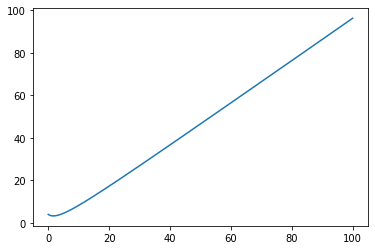

In [206]:
x_a = np.linspace(0,100,1000) #переменная x пробегает знначения от нуля до ста
y_a = -4 #зафиксируем y
F_a = F_f(x_a,y_a)
plt.plot(x_a,F_a) #строим график зависимости F от x при фиксированной переменной y
plt.show()

## Пример - симуляция полёта камня, брошенного под углом к горизонту

Попробую решить известную школьную задачу используя **sympy**.

Пусть мы бросаем камень массой $m$ под углом $\alpha$ к горизонту. Так как камень находится в поле силы тяжести на него действует сила $F = m\cdot g$.
Попробуем построить модель, рассчитывающую траекторию полёта камня в зависимости от начальных данных(угла и массы).

![title](kamen.png)

In [207]:
t,v0,alpha,g = smp.symbols(r't V_{0} \alpha g',positive = True,real = True) #объявляем переменные начальных данных
x = v0*smp.cos(alpha)*t #закон движения камня по оси x
y = v0*smp.sin(alpha)*t - g*(t**2)/2 #закон движения камня по оси y

In [208]:
x

V_{0}*t*cos(\alpha)

In [209]:
y

V_{0}*t*sin(\alpha) - g*t**2/2

Рассчитаем время падения, решив $y(t) = 0$

In [210]:
tFall = smp.solve(y,t)
tFall

[2*V_{0}*sin(\alpha)/g]

Теперь конвертируем функции в числовые

In [211]:
x_f = smp.lambdify([t,v0,alpha,g],x)
y_f = smp.lambdify([t,v0,alpha,g],y)
tFall_f = smp.lambdify([v0,alpha,g],tFall)

Теперь можем ввести параметры камня и построить симуляцию его падения, используя полученные числовые функции.

In [212]:
speed,alpha,g = 5,np.pi/3,9.81
tFall = tFall_f(speed,alpha,g)[0] #Время падения при заданных параметрах

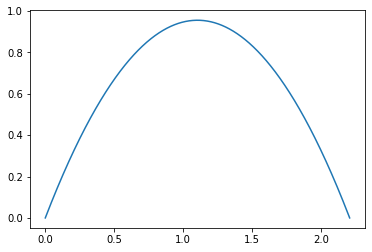

In [213]:
t = np.linspace(0,tFall,1000)
plt.plot(x_f(t,speed,alpha,g),y_f(t,speed,alpha,g))
plt.show()

## Матрицы

Заведём переменные, которые будут использованы в качестве компонент матриц.

In [214]:
x,y,z,u1,u2,u3,v1,v2,v3 = smp.symbols(r"x y z u_{1} u_{2} u_{3} v_{1} v_{2} v_{3}")

Для **создания матриц и векторов** используется метод `.Matrix(arr)`. Аргумент `arr` - массив(или другой итерируемый объект), состоящий из элементов матрицы. Данный массив может содержать как символьные объекты, так и числа(`int`,`float`,`double`...).

#### Создание строк и столбцов

При передаче одномерного массива в качестве аргумента методу `.Matrix()` создаётся столбец. Это сделано в угоду удосбства. Запись `.Matrix([el1,el2,el3])` проще чем `.Matrix([[el1],[el2],[el3]])`, хоть и результат их работы одинаковый:

In [219]:
uVector = smp.Matrix([u1,u2,u3]) #создаем столбец, передавая одномерный массив
uVector2 = smp.Matrix([[u1],[u2],[u3]]) #тот же столбец, но созданный двумерным массивом

In [220]:
uVector

Matrix([
[u_{1}],
[u_{2}],
[u_{3}]])

In [221]:
uVector2

Matrix([
[u_{1}],
[u_{2}],
[u_{3}]])

In [222]:
# Как видим результат одинаковый, убедимся в этом используя операцию сравнения двух матриц
uVector2 == uVector

True

Для создания строки придётся использовать операцию транспонирования:

In [224]:
vVector = smp.Matrix([v1,v2,v3]).T #создаем столбец и транспонируем его 
vVector

Matrix([[v_{1}, v_{2}, v_{3}]])

#### Создание матриц 

Передадим двумерный массив в качестве аргумента методу `.Matrix()`. Получится символьный матричный объект, при этом строки массива станут строками матрицы(всё предельно логично):

In [226]:
myMatrix = smp.Matrix([[2,1],[5,5],[3,1]])
myMatrix

Matrix([
[2, 1],
[5, 5],
[3, 1]])

#### Матричные операции

Над символьными матрицами можно проделывать всевозможные матричные операции. Разберемся, какие методы для этого используются

In [234]:
# Создаем матрицы, которые будут использованы для дальнейших примеров
uVector = smp.Matrix([u1,u2,u3])
vVector = smp.Matrix([v1,v2,v3]) 
mMatrix = smp.Matrix([[1,2],[0,1],[4,5]])


Операции **сложения, вычитания, умножения на число** могут быть сделаны с помощью операторов `+`,`-`,`*`:

In [229]:
2*uVector-3*vVector+7*vVector

Matrix([
[2*u_{1} + 4*v_{1}],
[2*u_{2} + 4*v_{2}],
[2*u_{3} + 4*v_{3}]])

**Скалярное произведение векторов** выполняется при помощи метода `.dot(mat1)` класса матричного объекта:

In [231]:
uVector.dot(vVector) #

u_{1}*v_{1} + u_{2}*v_{2} + u_{3}*v_{3}

**Векторное произвдение** осуществялется методов `.cross(vec)` класса матричного объекта:

In [235]:
uVector.cross(vVector)

Matrix([
[ u_{2}*v_{3} - u_{3}*v_{2}],
[-u_{1}*v_{3} + u_{3}*v_{1}],
[ u_{1}*v_{2} - u_{2}*v_{1}]])

Для **матриичного умножения** могут быть использованы операторы `*` и `@`:

In [239]:
vVector.T*mMatrix

Matrix([[v_{1} + 4*v_{3}, 2*v_{1} + v_{2} + 5*v_{3}]])

In [240]:
uVector.T@mMatrix

Matrix([[u_{1} + 4*u_{3}, 2*u_{1} + u_{2} + 5*u_{3}]])

**Найти норму** вектора позволяет метод `.norm()` класса матричного объекта

In [242]:
uVector.norm()

sqrt(Abs(u_{1})**2 + Abs(u_{2})**2 + Abs(u_{3})**2)

Рассмотренные ранее операции позволяют работать с векторами, и проделывать более сложные операции. Например можем найти проекцию одного вектора на другой:

In [246]:
projection = uVector.dot(vVector)*vVector/(vVector.norm()**2)
projection

Matrix([
[v_{1}*(u_{1}*v_{1} + u_{2}*v_{2} + u_{3}*v_{3})/(Abs(v_{1})**2 + Abs(v_{2})**2 + Abs(v_{3})**2)],
[v_{2}*(u_{1}*v_{1} + u_{2}*v_{2} + u_{3}*v_{3})/(Abs(v_{1})**2 + Abs(v_{2})**2 + Abs(v_{3})**2)],
[v_{3}*(u_{1}*v_{1} + u_{2}*v_{2} + u_{3}*v_{3})/(Abs(v_{1})**2 + Abs(v_{2})**2 + Abs(v_{3})**2)]])